# Homework 4

## Imports

In [17]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples
from pathlib import Path
import math


## Loading Data Set

In [18]:
IMAGES_DIR = Path('images')
IMAGES_DIR.mkdir(parents=True, exist_ok=True)
DATA_DIR = Path('data')
DATA_DIR.mkdir(parents=True, exist_ok=True)
DATA_FILE = 'column_diagnosis.arff'
DATA_PATH = DATA_DIR / DATA_FILE
data = loadarff(DATA_PATH)
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
# Show the first 5 rows
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


## Preprocessing

In [19]:
# Make the data unsupervised
X = df.drop('class', axis=1)

# Ground truth
y = df['class']

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Question 1

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 0.15841444  0.58002593  0.04660666  0.03721777  0.52493205  0.56939752
  0.54030937  0.59775243  0.58393748  0.35574628  0.53361184  0.48621866
  0.50486429  0.44845233  0.27580511  0.6113778  -0.0804783   0.55321841
  0.59546749  0.60049188  0.55576927  0.42955974  0.00265738  0.601018
  0.45523618  0.35630332  0.50311331  0.48052961  0.46830077 -0.01290668
  0.50960157  0.46938197  0.56093055  0.58834715  0.10706965  0.55058641
  0.55737679  0.46842963  0.2152424   0.50760391  0.50662251  0.5812984
  0.50500076 -0.06823269  0.22254158  0.385822    0.47323479  0.55436689
  0.55522004  0.53157566  0.45703163  0.05840698  0.3136496   0.53202909
  0.55668154  0.44359413  0.5734963   0.57668149  0.53332793  0.58928986
  0.28691724  0.43611721  0.48611634  0.3721485   0.3691969   0.35560531
  0.34154409  0.31471484  0.07454694  0.23724922  0.10008679  0.27994919
  0.39704224  0.39660778  0.30253642  0.19426146  0.35394116  0.18642615
  0.12957828  0.5824293   0.42440305  0.26807799  0.32

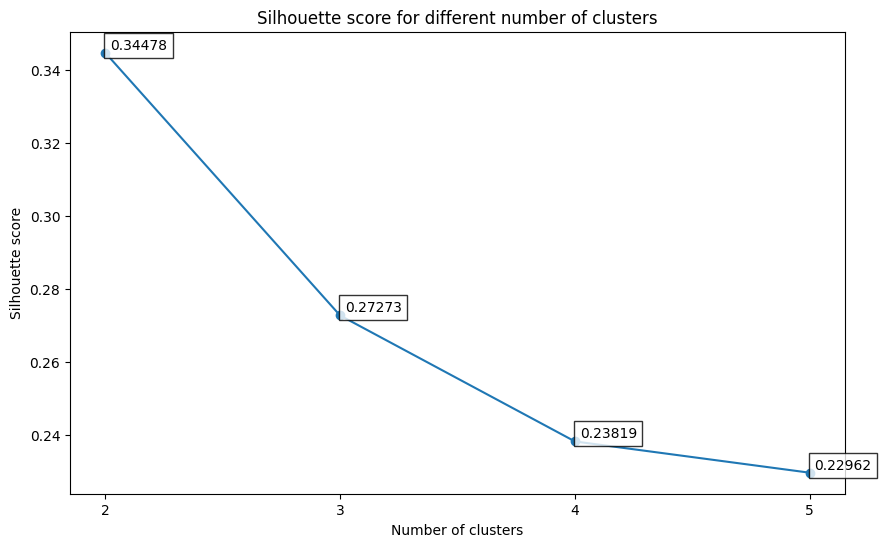

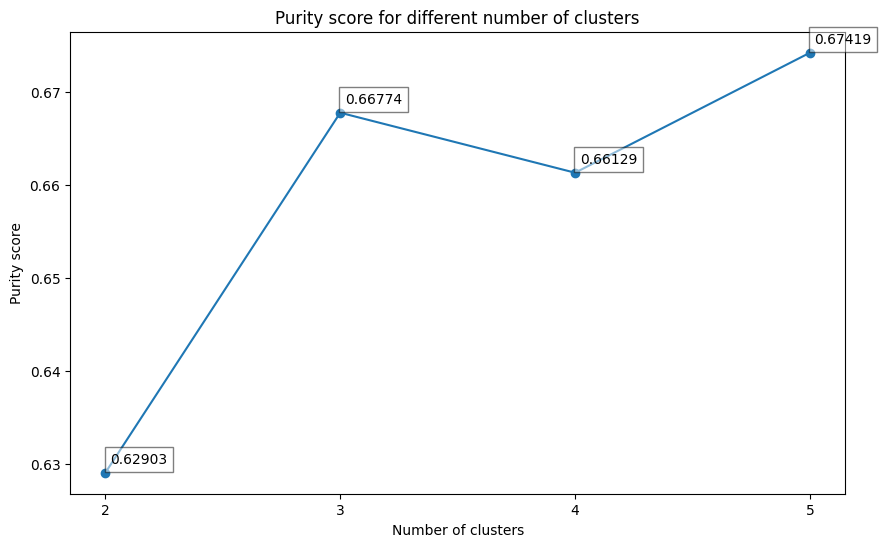

In [28]:
# Apply K-means clustering for k ∈ {2, 3, 4, 5}
k_values = [2, 3, 4, 5]
silhouette_scores = []
purity_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k,
                    random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Calculate silhouette score for each sample
    silhouette = silhouette_samples(X_scaled, cluster_labels)
    print(silhouette)

    # Split the silhouette scores by cluster
    silhouette_per_cluster = [silhouette[cluster_labels == i] for i in range(k)]

    # Calculate the average silhouette score for each cluster
    silhouette_per_cluster_avg = [np.mean(silhouette_per_cluster[i]) for i in range(k)]

    # Calculate the average silhouette score for all clusters
    silhouette_avg = np.mean(silhouette_per_cluster_avg)
    print(f'Silhouette score for {k} clusters: {silhouette_avg:.5f}')
    silhouette_scores.append(silhouette_avg)

    # Purity
    clusters = {i: [] for i in range(k)}
    for i in range(len(cluster_labels)):
        clusters[cluster_labels[i]].append(y[i])

    # Count the most frequent class in each cluster
    cluster_purities = [clusters[i].count(max(clusters[i], key=clusters[i].count)) for i in range(k)]

    # Calculate purity
    purity = sum(cluster_purities) / len(y)
    purity_scores.append(purity)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.xticks(k_values)
plt.ylabel('Silhouette score')
plt.title('Silhouette score for different number of clusters')
# Write the silhouette scores on the plot
for i, score in enumerate(silhouette_scores):
    plt.text(k_values[i] + 0.02, score + 0.001, f'{score:.5f}', bbox=dict(facecolor='white', alpha=0.8))
plt.savefig(IMAGES_DIR / 'silhouette.png')
plt.show()

# Plot the purity scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, purity_scores, marker='o')
plt.xlabel('Number of clusters')
plt.xticks(k_values)
plt.ylabel('Purity score')
plt.title('Purity score for different number of clusters')
# Write the purity scores on the plot
for i, score in enumerate(purity_scores):
    plt.text(k_values[i] + 0.02, score + 0.001, f'{score:.5f}', bbox=dict(facecolor='white', alpha=0.5))
plt.savefig(IMAGES_DIR / 'purity.png')
plt.show()

## Question 2

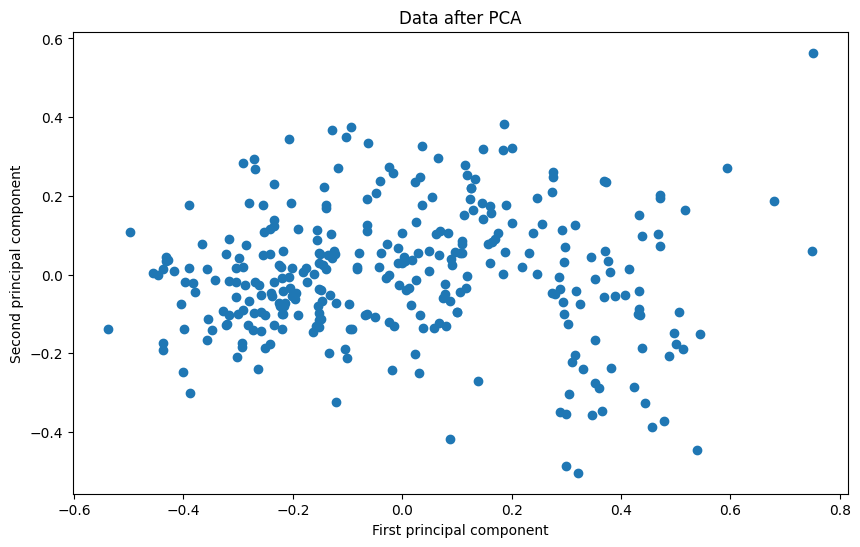

In [21]:
# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Data after PCA')
plt.savefig(IMAGES_DIR / 'pca.png')
plt.show()

### i) Identify the variability explained by the top two principal components.

In [25]:
print(f'Explained variance: {pca.explained_variance_ratio_}')

Explained variance: [0.56181445 0.20955953]


### ii) For each one of these two components, sort the input variables by relevance by inspecting the absolute weights of the linear projection.

In [23]:
# Scale Principal Components
xvector = pca.components_[0] * max(X_pca[:,0]) 
yvector = pca.components_[1] * max(X_pca[:,1])

# Compute Column Importance and Sort
columns = X.columns
impt_features = {columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(len(columns))}
sorted_features = sorted(zip(impt_features.values(),impt_features.keys()),reverse=True)
print("Features by importance:\n")
for i in range(len(sorted_features)):
    print(f'{sorted_features[i][1]} : {sorted_features[i][0]:.5f}')

Features by importance:

pelvic_tilt : 0.51544
pelvic_incidence : 0.44751
lumbar_lordosis_angle : 0.38913
sacral_slope : 0.34957
pelvic_radius : 0.33895
degree_spondylolisthesis : 0.16280


In [27]:
# Compute Column Importance for each component
xvector = pca.components_[0] * max(X_pca[:,0])
yvector = pca.components_[1] * max(X_pca[:,1])

columns = X.columns
impt_features = {columns[i] : math.sqrt(xvector[i]**2) for i in range(len(columns))}
sorted_features = sorted(zip(impt_features.values(),impt_features.keys()),reverse=True)
print("Features by importance for first component:\n")
for i in range(len(sorted_features)):
    print(f'{sorted_features[i][1]} : {sorted_features[i][0]:.5f}')

impt_features = {columns[i] : math.sqrt(yvector[i]**2) for i in range(len(columns))}
sorted_features = sorted(zip(impt_features.values(),impt_features.keys()),reverse=True)
print("\nFeatures by importance for second component:\n")
for i in range(len(sorted_features)):
    print(f'{sorted_features[i][1]} : {sorted_features[i][0]:.5f}')

Features by importance for first component:

pelvic_incidence : 0.44394
lumbar_lordosis_angle : 0.38651
pelvic_tilt : 0.35046
sacral_slope : 0.24439
degree_spondylolisthesis : 0.16278
pelvic_radius : 0.08691

Features by importance for second component:

pelvic_tilt : 0.37797
pelvic_radius : 0.32762
sacral_slope : 0.24994
pelvic_incidence : 0.05640
lumbar_lordosis_angle : 0.04513
degree_spondylolisthesis : 0.00258


# Question 3


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


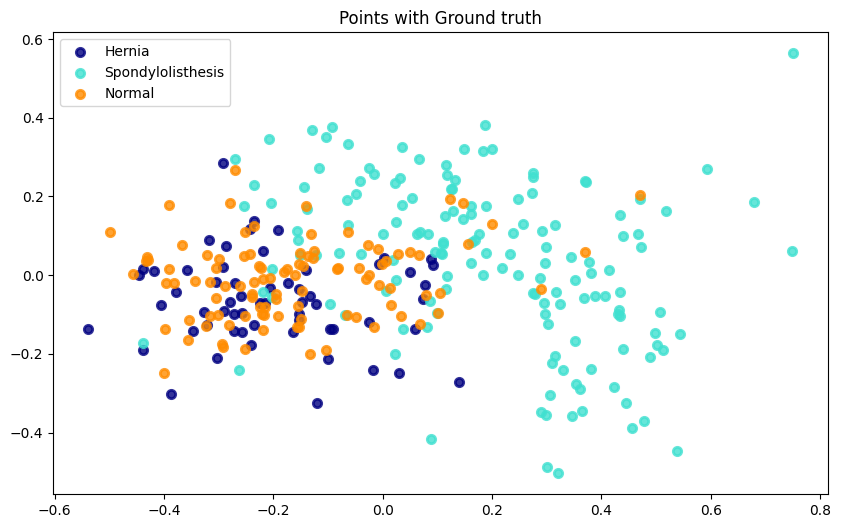

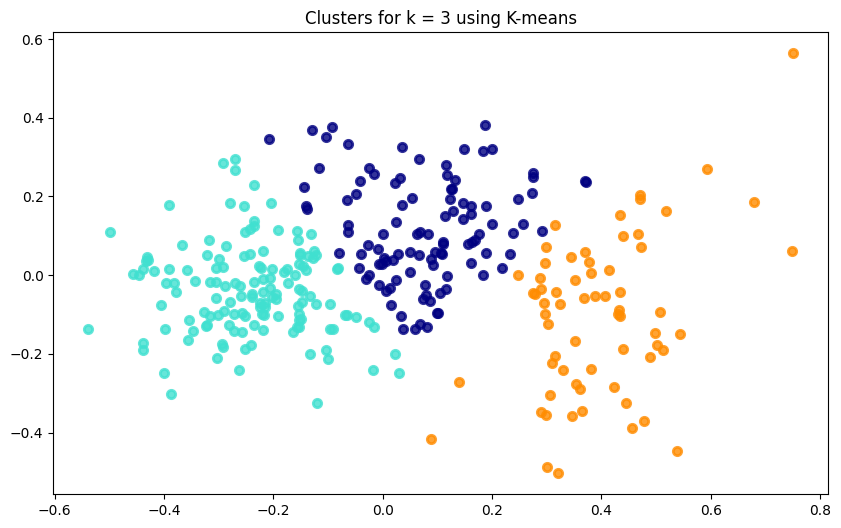

cluster 0
Normal: 24
Hernia: 8
Spondylolisthesis: 73

cluster 1
Normal: 73
Hernia: 51
Spondylolisthesis: 16

cluster 2
Normal: 3
Hernia: 1
Spondylolisthesis: 61

['Spondylolisthesis', 'Normal', 'Spondylolisthesis']


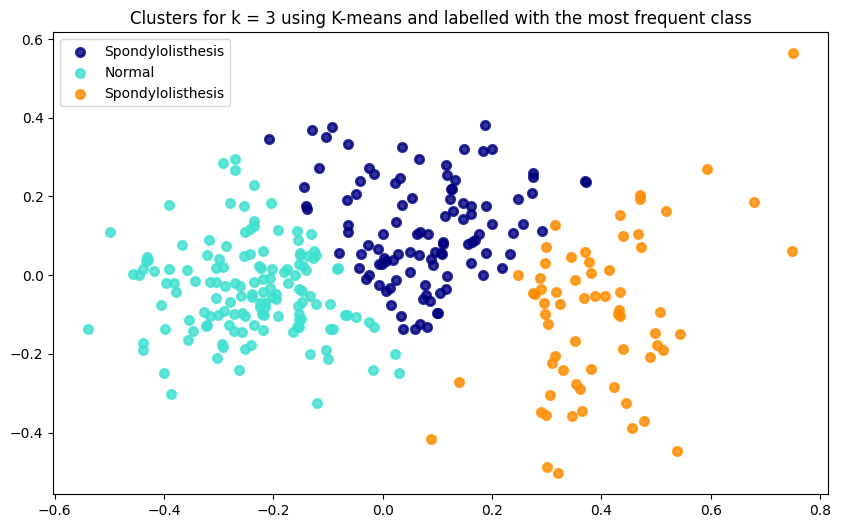

In [24]:
# K-means clustering with k = 3
k = 3
kmeans = KMeans(n_clusters=k,
                random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Plot the data with y = ground truth
target_names = y.unique()
colors = ['navy', 'turquoise', 'darkorange']
plt.figure(figsize=(10, 6))

for i, targets in enumerate(target_names):
    plt.scatter(X_pca[y==targets,0],
                X_pca[y==targets,1],
                color=colors[i],
                alpha=.8,
                lw=2,
                label=targets)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Points with Ground truth')
plt.savefig(IMAGES_DIR / 'ground_truth.png')
plt.show()

# Plot the data with y = cluster labels
plt.figure(figsize=(10, 6))



for i, targets in enumerate(target_names):
    plt.scatter(X_pca[cluster_labels==i,0],
                X_pca[cluster_labels==i,1],
                color=colors[i],
                alpha=.8,
                lw=2)

plt.title('Clusters for k = 3 using K-means')
plt.savefig(IMAGES_DIR / 'clusters.png')
plt.show()

# Clusters if we assigned the max ground truth class to each cluster
# Attribute Cluster label to a ground truth class
clusters = {i: [] for i in range(3)}
for i in range(len(cluster_labels)):
    clusters[cluster_labels[i]].append(y[i])
for i in range(len(clusters)):
    print(f'cluster {i}')
    print(f'Normal: {clusters[i].count("Normal")}')
    print(f'Hernia: {clusters[i].count("Hernia")}')
    print(f'Spondylolisthesis: {clusters[i].count("Spondylolisthesis")}\n')
lista = [max(clusters[i], key=clusters[i].count) for i in range(3)]
print(lista)

plt.figure(figsize=(10, 6))
for i, targets in enumerate(target_names):
    plt.scatter(X_pca[cluster_labels==i,0],
                X_pca[cluster_labels==i,1],
                color=colors[i],
                alpha=.8,
                lw=2,
                label=lista[i])
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Clusters for k = 3 using K-means and labelled with the most frequent class')
plt.savefig(IMAGES_DIR / 'clusters.png')
plt.show()

